In [89]:
import os
import sys
import pandas as pd
import psycopg2 
from pword import engine
from sqlalchemy import table, column
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt







In [90]:
print(engine.table_names())

['departments', 'dept_manager', 'titles', 'employees', 'dept_emp', 'salaries']


/var/folders/qt/z1139kj16rq91qs03f19sz2c0000gn/T/ipykernel_61923/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [91]:
dept_tb = pd.read_sql_table('departments',engine)
dept_mgr_tb = pd.read_sql_table('dept_manager',engine)
titles_tb = pd.read_sql_table('titles',engine)
emp_tb = pd.read_sql_table('employees',engine)
sal_tb = pd.read_sql_table('salaries',engine)

sal_tb.mean()

emp_no    253321.763392
salary     52970.732451
dtype: float64

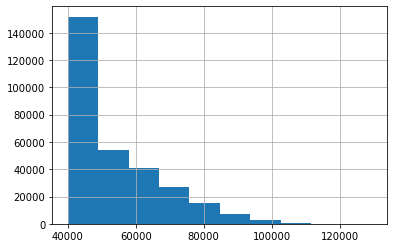

In [92]:
sal_tb["salary"].hist()
plt.show()

In [93]:
salary_title_df = pd.concat([sal_tb, titles_tb], axis=1, join='inner')
display(salary_title_df)

,emp_no,salary,title_id,title
0,10001,60117,s0001,Staff
1,10002,65828,s0002,Senior Staff
2,10003,40006,e0001,Assistant Engineer
3,10004,40054,e0002,Engineer
4,10005,78228,e0003,Senior Engineer
5,10006,40000,e0004,Technique Leader
6,10007,56724,m0001,Manager


In [94]:
#Create a bar chart of average salary by title
sal_title_gp = salary_title_df.groupby(["title"]).mean()["salary"]

sal_title_gp


title
Assistant Engineer    40006.0
Engineer              40054.0
Manager               56724.0
Senior Engineer       78228.0
Senior Staff          65828.0
Staff                 60117.0
Technique Leader      40000.0
Name: salary, dtype: float64

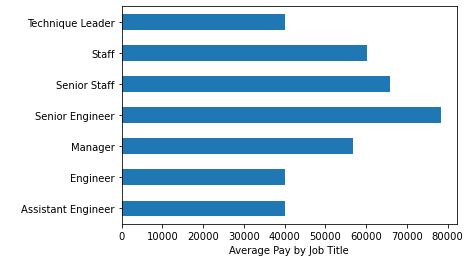

In [95]:
sal_title_gp.plot(x = "title", y = "salary", kind = "barh")
plt.xlabel("Average Pay by Job Title")
plt.ylabel(" ")



plt.show()